<a href="https://colab.research.google.com/github/allanstar-byte/Hass-Consulting-Company/blob/main/Hass_Consulting_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hass Consulting Company**

## **1. Defining the Question**

### **a) Specifying the Question**

TO study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### **b) Defining the Metric for Success**

The analysis will be considered a success when a high accuracy level is achieved for the prediction of the model

### **c) Understanding the context**

At this research question as a Data scientist am entitled to come up with a model after Explolatory Data Analysis which can be used for the prediction purposes by Hass Consulting Company. The model will indicate which factors affect the real estate and try to make use of them for predicton purposes.

### **d) Experimental Design**

The experiantal desigh to be used is the CRISP-DM format.

1. Business understanding

2. Data Understanding

3. Data cleaning

4. Exploratory Data Analysis

5. Modeling

6. Evaluation/ Hyperameter tuning

### **e) Data Relevance**

The datasets are large enough to be used for analysis and modelling, thus promising a better outcome.

## **Reading the Data**

In [68]:
# importing the relevant libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [69]:
# loading the datset
house = pd.read_csv('/content/house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **2. Data understanding**

In [70]:
# checking the data types of the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [71]:
#checking for the null values
house.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [72]:
# checking for the duplicated values
house.duplicated().sum()

3

In [73]:
#checking the dataet's shape
house.shape

(21613, 20)

## **3. Data Cleaning**

In [74]:
#dropping the id and zip code column
house_1 = house.drop(columns={'id', 'zipcode'}, axis='columns')
house_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [75]:
# checking for the outliers using kurtosis
house_1.kurt()

price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
lat               -0.676313
long               1.049501
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

I have recognised the precence of outlirs but i will not remove them because some rooms by be very large with also large specifications and thus causing extream values

In [76]:
house_1.duplicated().sum()

5

In this case i will not reove the duplicated values because some rooms may have similar specifications thus calling for the presence of duplication of values

### **incorporating a cartegorical variable**

The size of the room will be measured by the number of bedrooms, the more the bedroos the larger the house.The cartegorical variable will be whether a house a many bedrooms or few.
a room with above 4 bedroos will be considered as having many while below 4 the room will be considered to having few bedrooms

bedrooms >= 4 = 1

bedrooms < 4 = 0

In [77]:
def f(row):
    if row['bedrooms'] >= 4:
        val = 1
    else:
        val = 0
    return val

house_1['rating'] = house_1.apply(f, axis=1)

In [78]:
house_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,rating
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,0


In [79]:
house_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  rating

## **4. Exploratory data analysis**

In [80]:
#summary of the dataset
house_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,rating
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,0.407949
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.491465
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


### **a) Univariate Analysis**

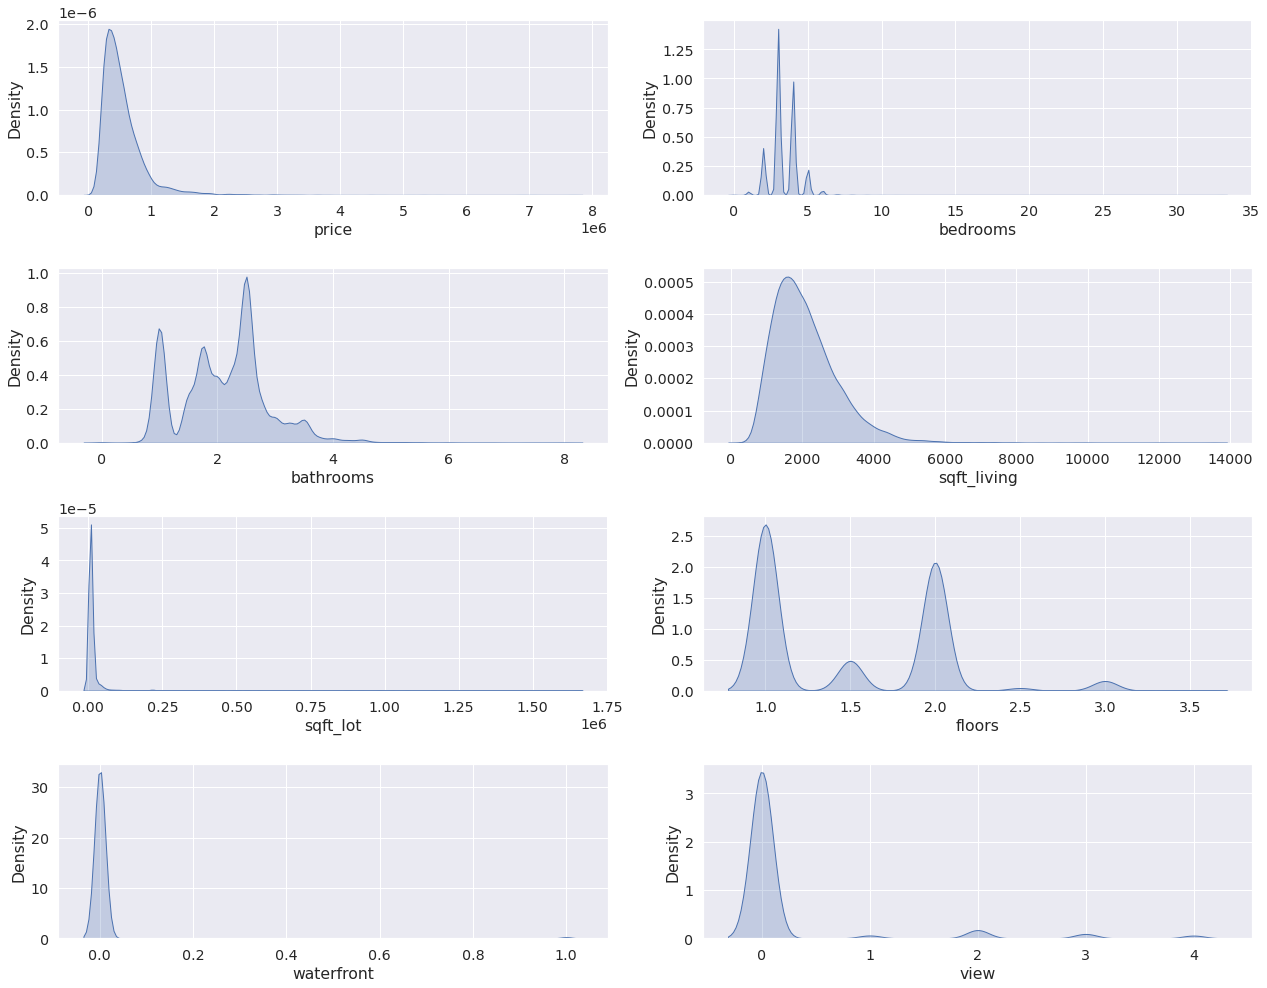

In [81]:
# plotting  the 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' columns
# using the density plot
df = house_1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' ]]
df1 = df.describe()
df1 

sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(df1 ):
  plot = sns.kdeplot(data=house_1, x=c, ax=axes[i], fill=True)
plt.tight_layout()

From the graphs we can observe that the variables don't have a normal distribution.since for a normal distribution has a bell-sahaped figure around the mean.

### **b) Bivariate analysis**

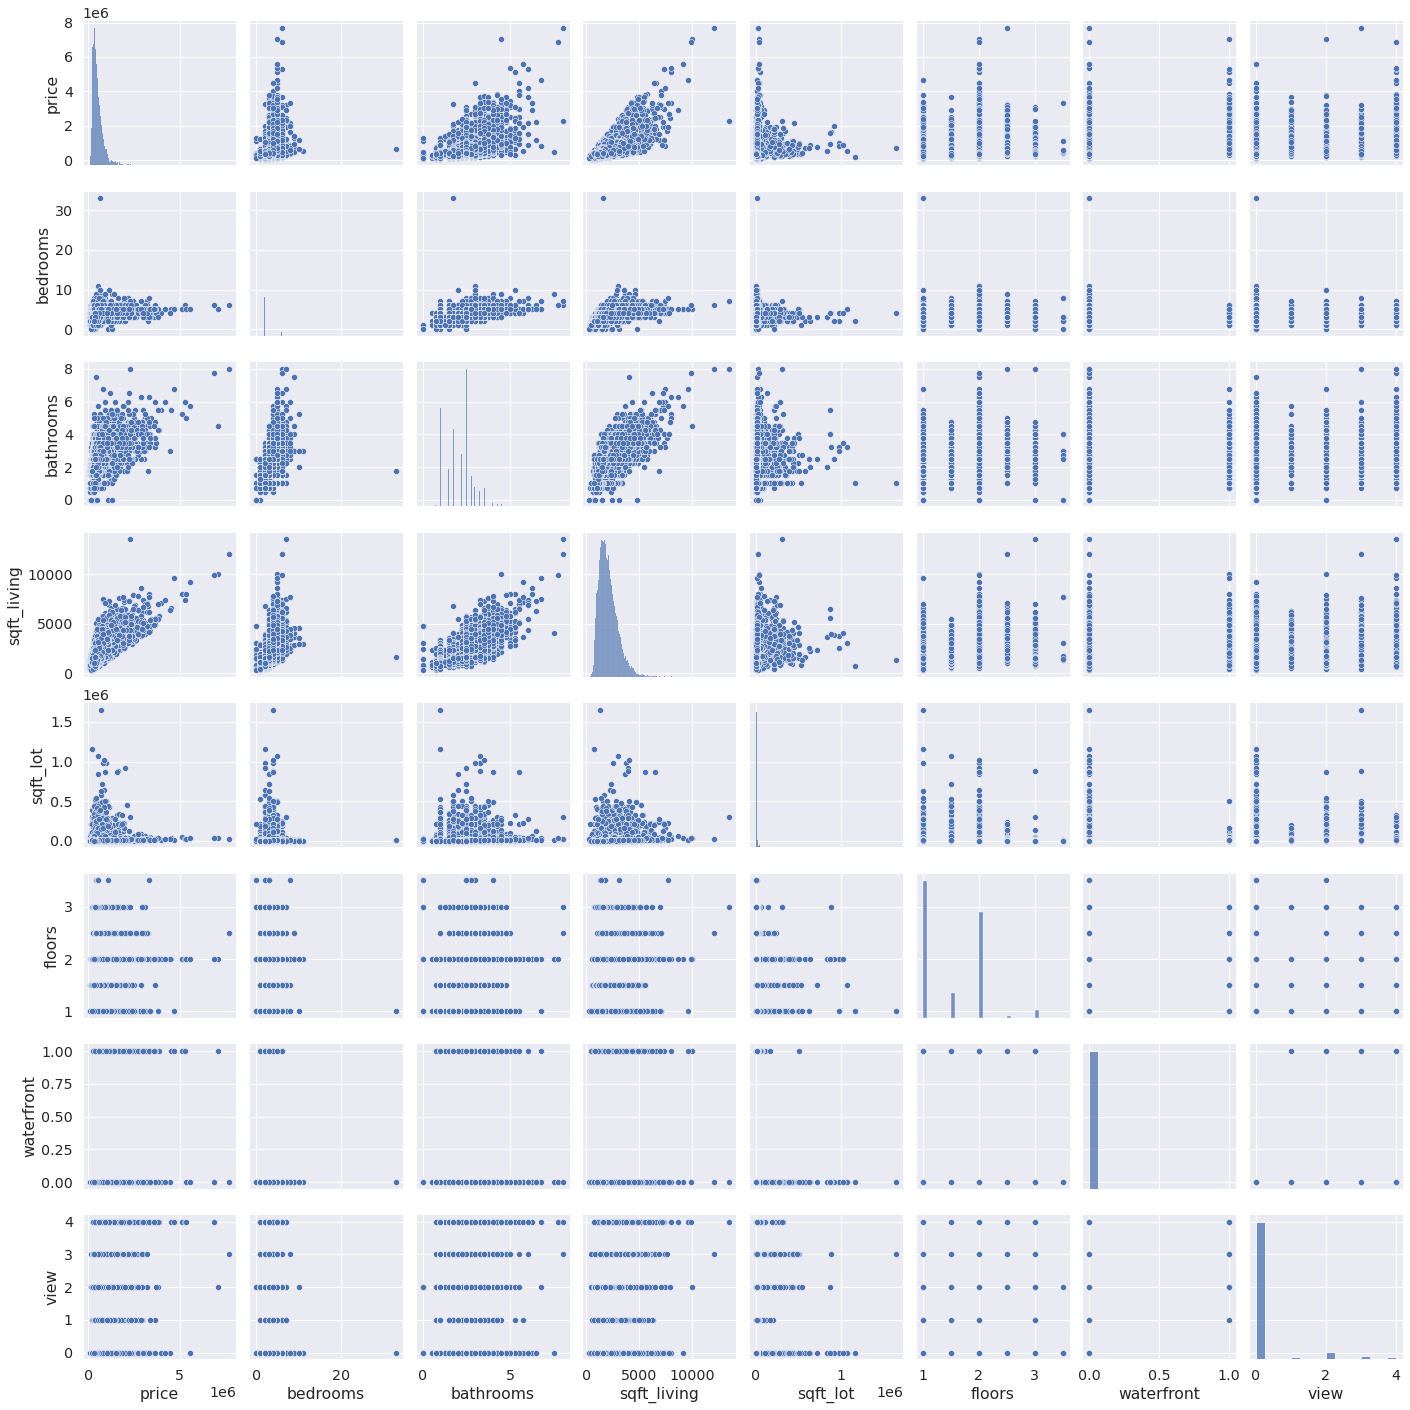

In [82]:
import warnings
warnings.simplefilter('ignore')
sns.pairplot(data=df)

The pair plot will enable in understanding the relationship of each variable with the other one. For example, some variables are exhibiting a linear relationship such as the bathrooms and the sqft_living variacles

### **c) Multivariate analysis**

#### **Factor Aanalysis**

I will chose factor analysis technique as my reduction technique because the dependent variable(price) is a continous variable. For principal component analysi and Linear disciminant analysis requres a cartegorical dependent variable and a continous independent variables.

In [83]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

In [84]:
#Adequacy Test using bartlett test
df1 = house_1.drop(['price'], axis='columns')
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(nan, nan)

Bartlett test is for testing the homogeneity of variance across groups, in my case, there are no variance, as all the groups contain equal values.

In [85]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

0.7196049410367004

The overall KMO for our data is 0.7196049410367004, which is not that bad. This value indicates that you can proceed with your planned factor analysis.

In [86]:
#Choosing the Number of Factors

# Creating factor analysis object and perform factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df1, 5, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.437434e+00
1,2.124266e+00
2,1.813782e+00
3,1.453805e+00
4,1.092877e+00
5,1.030997e+00
6,8.461361e-01
7,8.171877e-01
8,7.594950e-01
9,6.233704e-01


Here, we can see only for 16-factors eigenvalues are greater than one. It means we need to choose only 16 factors (or unobserved variables)

In [87]:
#Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df1, 16, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16
bedrooms,0.290389,0.123107,-0.002096,0.857263,0.077715,-0.010562,0.038076,0.010959,-0.036976,0.080461,-0.033151,0.006532,-0.054617,0.040422,0.045579,-0.032395
bathrooms,0.612458,0.217523,0.027850,0.298972,0.504914,0.063449,0.101786,0.048675,0.100478,0.196782,-0.022288,0.014010,0.000819,-0.007298,-0.004262,0.011744
sqft_living,0.856416,0.282665,0.112231,0.330679,0.111220,0.119144,0.061237,0.039488,0.023124,-0.020541,0.015551,-0.120485,0.007333,0.009651,-0.006078,-0.119915
sqft_lot,0.077073,0.005802,0.849520,0.008955,0.001198,0.025023,0.057577,0.004250,0.004307,0.012633,-0.060328,0.003349,0.003402,-0.104965,0.031891,-0.022945
floors,0.383517,-0.251064,-0.036482,0.080620,0.565873,0.011340,-0.023990,-0.011177,0.281340,-0.064302,0.066109,-0.013757,-0.007068,-0.005933,0.007762,-0.009745
waterfront,0.024515,-0.005259,0.005863,-0.011340,0.020128,0.613203,0.014664,0.066498,-0.008425,0.002920,-0.009906,-0.004840,0.002367,0.014644,-0.068357,-0.065302
view,0.206105,0.146743,0.050321,0.012256,-0.013712,0.668877,-0.102971,0.061946,-0.044504,-0.002973,-0.014115,0.012186,-0.003896,-0.023612,0.111918,0.115046
condition,-0.080326,0.087745,0.000110,0.030436,-0.075074,0.032872,-0.041654,-0.070002,-0.608678,0.000162,-0.024194,0.012144,0.003847,0.005605,-0.003726,-0.006025
grade,0.818280,0.048084,0.059968,0.126290,0.185711,0.112975,0.013779,-0.029996,0.128166,-0.005483,0.146043,0.296964,-0.013136,-0.018119,0.017444,0.026119
sqft_above,0.884479,-0.186914,0.119640,0.266730,0.162576,0.058422,0.114587,0.016639,0.103513,-0.024631,-0.043278,-0.136786,0.008319,0.010799,-0.008053,-0.137414


Factor 1 has a high factor loading for : sqft_above

Factor 2 has a high factor loading for : sqft_basement

Factor 3 has a high factor loading for : sqft_lot

Factor 4 has a high factor loading for : bedrooms

Factor 5 has a high factor loading for : foors

Factor 6 has a high factor loading for : view

Factor 7 has a high factor loading for : long

Factor 8 has a high factor loading for : yr_renovated

Factor 9 has a high factor loading for : condition

Factor 10 has a high factor loading for : bathrooms

Factor 11 has a high factor loading for : lat

Factor 12 has a high factor loading for : grade

Factor 13 has a high factor loading for : rating

Factor 14 has a high factor loading for : yr_built

Factor 15 has a high factor loading for : bedrooms

Factor 16 has a high factor loading for : rating

In [88]:
#Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16
SS Loadings,3.719372,1.169653,1.515572,1.818520,0.862171,0.919113,0.576114,0.522961,0.822757,0.056689,0.407235,0.175183,0.008012,0.030896,0.025952,0.142769
Proportion Var,0.206632,0.064981,0.084198,0.101029,0.047898,0.051062,0.032006,0.029053,0.045709,0.003149,0.022624,0.009732,0.000445,0.001716,0.001442,0.007932
Cumulative Var,0.206632,0.271613,0.355811,0.456840,0.504738,0.555800,0.587806,0.616860,0.662569,0.665718,0.688342,0.698075,0.698520,0.700236,0.701678,0.709609


70.96% cumulative Variance is explained by the 16 factors.

## **5. Modelling**

In [89]:
# imporing modelling libraries
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Ridge

from sklearn.linear_model import ElasticNet

In [90]:
# defining x and y values
x = house_1.drop(columns={'price', 'rating'}).values

y = house_1['price'].values

### **a) Multiple Linear Regression**

In [91]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# Train using 80% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
regressor.coef_

array([-3.18830187e+04,  4.10904410e+04,  1.05070448e+02,  1.42146649e-01,
        3.89830695e+03,  5.76541258e+05,  4.74021163e+04,  3.41528525e+04,
        9.86160465e+04,  6.72270521e+01,  3.78433954e+01, -2.48186270e+03,
        2.18587051e+01,  5.60240714e+05, -1.11786959e+05,  2.97887345e+01,
       -3.95482037e-01])

In [93]:
#creating an object for the model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [94]:
#fitting the model
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
##accuracy of the model
clf.score(x_test, y_test)

0.6862614103249545

The multiple linear regression for the model has a predictability power of 69.10%

### **b) Quantile Regression**

#### **Quantile regression for the indepedent variables**

In [96]:
!pip install mlinsights

In [97]:
from mlinsights.mlmodel import QuantileLinearRegression
# creting and object for quantile regression
clq = QuantileLinearRegression()


In [98]:
# fitting the model

clq.fit(x_train, y_train)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
                         max_iter=10, n_jobs=1, normalize=False, quantile=0.5,
                         verbose=False)

In [99]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(x_train, y_train)


[QuantileLinearRegression.fit] iter=1 error=2173453223.317383
[QuantileLinearRegression.fit] iter=2 error=2141582667.058768
[QuantileLinearRegression.fit] iter=3 error=2116851787.3055928
[QuantileLinearRegression.fit] iter=4 error=2094123210.103513
[QuantileLinearRegression.fit] iter=5 error=2080683157.9180207
[QuantileLinearRegression.fit] iter=6 error=2066388174.8189054
[QuantileLinearRegression.fit] iter=7 error=2057210016.2950165
[QuantileLinearRegression.fit] iter=8 error=2051524530.0305572
[QuantileLinearRegression.fit] iter=9 error=2045423312.3706286
[QuantileLinearRegression.fit] iter=10 error=2041265963.7705328
[QuantileLinearRegression.fit] iter=11 error=2038227759.2872481
[QuantileLinearRegression.fit] iter=12 error=2035231040.290258
[QuantileLinearRegression.fit] iter=13 error=2032669069.8790553
[QuantileLinearRegression.fit] iter=14 error=2030797323.6528783
[QuantileLinearRegression.fit] iter=15 error=2029438526.708764
[QuantileLinearRegression.fit] iter=16 error=202818043

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
                         max_iter=20, n_jobs=1, normalize=False, quantile=0.5,
                         verbose=True)

In [100]:
clq.score(x_test, y_test)

117441.00377674474

#### **Least Absolute Deviation**


The LAD model is a special case of quantile regression where q=0.5

I will use the sqft_above variable for the quantile regression since it has the highest factor Loading

In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [102]:
mod = smf.quantreg('sqft_above ~ price', house_1)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:             sqft_above   Pseudo R-squared:               0.1787
Model:                       QuantReg   Bandwidth:                       109.4
Method:                 Least Squares   Sparsity:                        1460.
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        16:40:30   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    907.6332      8.831    102.781      0.000     890.324     924.942
price          0.0014   1.35e-05    101.700      0.000       0.001       0.001

The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


**Visualizing the results**

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.



In [103]:
#Prepare data for plotting¶
#For convenience, we place the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary.
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['price']] + \
            res.conf_int().loc['price'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('sqft_above ~ price', house_1).fit()
ols_ci = ols.conf_int().loc['price'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['price'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q            a         b        lb        ub
0  0.05   531.611470  0.000784  0.000762  0.000806
1  0.15   668.730159  0.000921  0.000899  0.000943
2  0.25   752.550256  0.001031  0.001011  0.001052
3  0.35   639.041923  0.001153  0.001129  0.001177
4  0.45   876.558229  0.001287  0.001263  0.001312
5  0.55   567.082994  0.002034  0.002010  0.002057
6  0.65  1010.741581  0.001734  0.001702  0.001766
7  0.75  1092.853465  0.002053  0.002020  0.002086
8  0.85  1055.967527  0.002520  0.002489  0.002551
9  0.95  1321.779447  0.002864  0.002831  0.002897
{'a': 1051.0216252831153, 'b': 0.001365037799752587, 'lb': 0.0013411200680534087, 'ub': 0.0013889555314517653}


**plot**


This plot compares best fit lines for 10 quantile regression models to the least squares fit. we see that:

price  increases with sqft_above

The dispersion of price increases with sqft_above



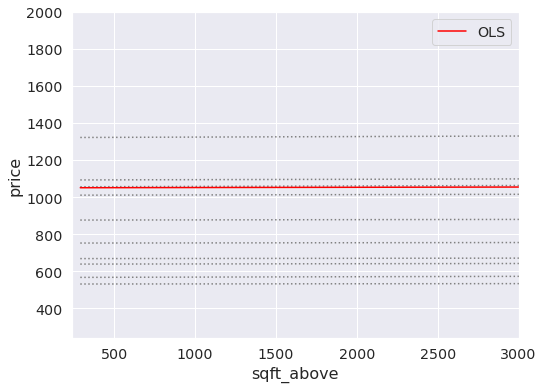

In [104]:
x = np.arange(house_1.sqft_above.min(), house_1.sqft_above.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(house_1.sqft_above, house_1.price, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('sqft_above', fontsize=16)
ax.set_ylabel('price', fontsize=16);

The least squares estimates fit low sqft_above observations quite poorly (i.e. the OLS line passes over most low sqft_above houses)

### **c) Ridge Regression**

In [105]:
# reshaping the dataset
x = x.reshape(-1,1)


In [106]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

5.141628124475787e-26


The output  value of 5.141628124475787e-26 will be our indicator to determine if the regularized ridge regression model is superior or not.

In [107]:
#determining the L1 and L2 regularization
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [108]:
# using .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

1.5910831178926994e-09

The best_params_ tells us what to set alpha too which in this case is 0.01. 

The best_score_ tells us what the best possible mean squared error is. 
In this case, the value of 1.5910831178926994e-09 is better than what the baseline model was. 

In [109]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(second_model)

0.0012743671900201988


The 41107854412.543236 is greater than the 1.5910831178926994e-09. This is because the last results are not cross-validated. 
In addition, these results indicate that there is a difference between the ridge and baseline models. 


In [110]:
ridge.score(x, y)

0.9999019703950593

The predicticatability power of the ridge regression is 0.695381766763215

### **d) Lasso regression**

In [111]:
# Creating lasso object
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)


lasso best parameters: {'alpha': 24.0}
lasso score: 0.686235134748228
linear score: 0.6862614103249545
lasso MSE: 44857181500.87431
linear MSE: 44853425030.83959
lasso best estimator coef: [-3.18645710e+04  4.10070046e+04  2.76732749e+02  1.41201684e-01
  3.90810929e+03  5.73022013e+05  4.75448852e+04  3.40455816e+04
  9.86753607e+04 -1.04423372e+02 -1.33681805e+02 -2.48577770e+03
  2.18628940e+01  5.58931633e+05 -1.10208332e+05  2.96893764e+01
 -3.96439662e-01]
linear coef: [-3.18830187e+04  4.10904410e+04  1.05070448e+02  1.42146649e-01
  3.89830695e+03  5.76541258e+05  4.74021163e+04  3.41528525e+04
  9.86160465e+04  6.72270521e+01  3.78433954e+01 -2.48186270e+03
  2.18587051e+01  5.60240714e+05 -1.11786959e+05  2.97887345e+01
 -3.95482037e-01]


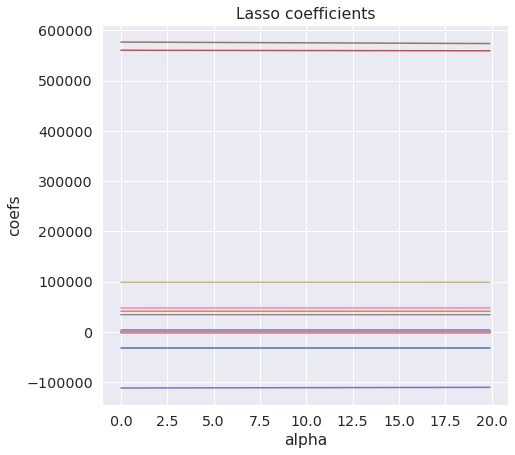

In [112]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 

Therefore Lasso can also be used to determine which features are important 

to us and keeps the features that may influence the target variable

### **e) ElasicNet Regression**

In [113]:
# Elastic Net Model
 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [114]:
# fitting the model
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
# Elastic net score 

elastic.score(x_test, y_test)

0.4323061552214521

The elastic net regression is performing poorly with a predictability power of 46.17%

## **Multicolinearity**

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [118]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,price,6.890638
1,bedrooms,13.246478
2,bathrooms,23.844363
3,sqft_living,23.724718
4,sqft_lot,1.178109
5,floors,9.499974
6,waterfront,1.102839


We can see here that the bathrooms, sqft_living, bedrooms have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

### **Fixing Multicolinearity**

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

In [119]:
# dropping the variables which are highly correlated
X = df.drop(['bathrooms', 'sqft_living'],axis=1)
calc_vif(X)

,variables,VIF
0,price,4.472268
1,bedrooms,7.924693
2,sqft_lot,1.140627
3,floors,7.155530
4,waterfront,1.230353
5,view,1.472529


## **Heteroskedasticity**

In [120]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(x_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0

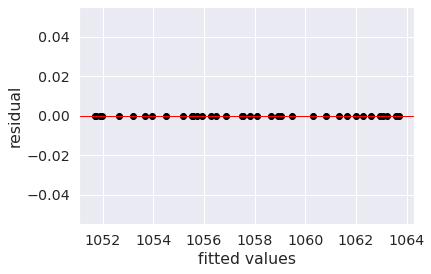

In [121]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [122]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## **Challenging the solution**

The model performance is affected by the distribution. since there is no test of normalty to obtain a data with a noral distribution

## **Recommendation**

 For prediction purposes I recommend the Hass Consulting Company to use Lasso regression since, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes.

Therefore Lasso can also be used to determine which features are important

to us and keeps the features that may influence the target variable